## Bregman dynamics, contact transformations and convex optimization
Alessandro Bravetti, Maria L Daza, Hugo Flores-Arguedas, Michael Betancourt

We propose a Relativistic Bregman algorithm, and show in several bechmark examples that it compares favorably with respect to standard optimization algorithms such as classical momentum, Nesterov's accelerated gradient, and other approach.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import examples as exa
import scipy.integrate as si
from plot_ex import plot_order, plot_contourn
from integrators import HBr
plt.rcParams['font.size'] = 15


### Relativistic/Euclidean Bregman 
$$
\begin{aligned}
%\begin{array}{c}
&\varphi_{\tau}^{A,R}\left(\begin{array}{c}
X \\ P \\ S \end{array}\right)=\left(\begin{array}{c}
X+\frac{e^{\alpha} v\, P}{\sqrt{||P||^{2}+v^{2} m^{2}}} \tau \\ P \\ S+e^{\alpha} v\left(\frac{-v^{2}m^{2}}{\sqrt{||P||^{2}+v^{2} m^{2}}}\right) \tau
\end{array}\right),\hspace{4mm} \varphi_{\tau}^{A,E}\left(\begin{array}{c}
X \\ P \\ S
\end{array}\right)=\left(\begin{array}{c}
X+ e^{\alpha} P \tau \\
P \\
S+\frac{e^{\alpha}||P||^2 \tau}{2}
\end{array}\right) 
\\
&\varphi_{\tau}^{B}\left(\begin{array}{c}
X \\
P \\
S
\end{array}\right)=\left(\begin{array}{c}
X \exp \left(-e^{\alpha} \tau\right) \\
P \exp \left(e^{\alpha} \tau\right) \\
S
\end{array}\right) \\
&\varphi_{\tau}^{C}\left(\begin{array}{c}
X \\
P \\
S
\end{array}\right)=
\left(\begin{array}{c}
X \\
-e^{\alpha+\beta} \nabla f(X) \tau+P \\
-e^{\alpha+\beta} f(X) \tau+S
\end{array}\right)\\
&\varphi_{\tau}^{D}\left(\begin{array}{c}
X \\
P \\
S
\end{array}\right)=\left(\begin{array}{c}
X \\
P \exp \left(-e^{\alpha} \tau\right) \\
S \exp \left(-e^{\alpha} \tau\right)
\end{array}\right)
%\end{array}
\end{aligned}
$$ 
where $\alpha(t)=t^c$, $\beta(t)=Ct^c$. We obtain the second--order contact integrator $\varphi_{\tau}^{K}$ with the composition 
 $$\varphi_{\tau / 2}^{D} \circ \varphi_{\tau / 2}^{B}\circ \varphi_{\tau / 2}^{C} \circ \varphi_{\tau}^{A} 
 \circ \varphi_{\tau / 2}^{C} \circ \varphi_{\tau / 2}^{B} \circ \varphi_{\tau / 2}^{D}$$




Method                          |Method        | Abbrev  |X0 |P0        |X0t    |P0t
--------                        |---------     | ------- |---|-----     |----- |-----
Euclidean Bregman Bravetti      |              |  EB     |0  | gradh(P0)|   -  | -
Relativistic Bregman Bravetti   |              |  RB     |0  | gradh(P0)|  -   |-
Direct HTVI                     |Direct HTVI[1]|HTVI_d   |0  | 0        |(0,1) |-Hbr(X0,P0,X0t)
Adaptative HTVI                 |Adap. HTVI [1]|HTVI_adap|0  | 0        |(0,1) |-Hbr(X0,P0,X0t)

[1] Duruisseaux, V., Schmitt, J., & Leok, M. (2021). Adaptive Hamiltonian variational integrators and applications to symplectic accelerated optimization. SIAM Journal on Scientific Computing, 43(4), A2949-A2980.

[2] França, Guilherme, Michael I. Jordan, and René Vidal. "On dissipative symplectic integration with applications to gradient-based optimization." Journal of Statistical Mechanics: Theory and Experiment 2021.4 (2021): 043402.


## Quadratic function

\begin{equation}\label{eq:quad}
f(X)=\frac{1}{2}X^T AX,\quad X \in \mathbb{R}^{500},\quad \lambda(A)\sim \mathcal{U}(10^{-3},1),
\end{equation}

where $A \in \mathbb{R}^{500 \times 500}$ is a positive--definite random matrix with eigenvalues 
uniformly distributed over the range $[10^{-3},1].$ 

$x_0=(1,1,...,1)$

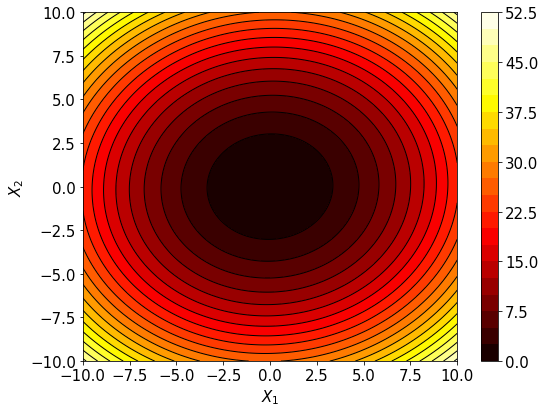

In [4]:
n = 100
seed=0
ex = exa.Ex_Quadratic(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=1,save=False)

In [5]:
## Parameters
dt =1e-3
c = 2 # order # 4
C = 1
m=0.01
v=1000
mu=0.8
steps =6000
params=[v, m, c, C, mu]

p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

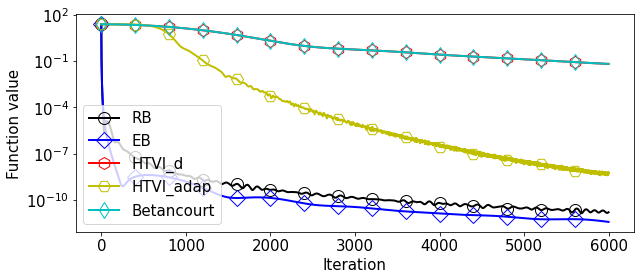

In [6]:
plt.figure(figsize=(10, 4))
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

#plot_order('EB_adap', color='g', marker='>',params=params, dt=dt,steps=steps,ex=ex, init=init)


## Correlated quadratic function
Let us consider the correlated quadratic function
$$
f(X)=\frac{1}{2} X^{T} A X, \quad A_{i j}=\frac{\sqrt{i j}}{2^{|i-j|}} \quad \text { for } \quad i, j=1, \ldots, 50
$$
The initial position in each is sampled uniformly at random in the range $-1 \leq X_{0, i} \leq 1$.

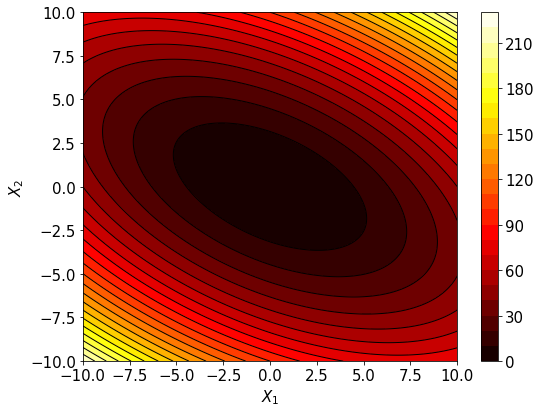

In [33]:
n = 10
seed = 0
ex = exa.Ex_Corr_Quadratic(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=1,save=False)

In [34]:
# Params
dt = 1e-4
c = 2# order
C = 0.001
steps = 30000
m=0.01
v=1000
mu=0.8
params=[v, m, c, C,mu]

p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

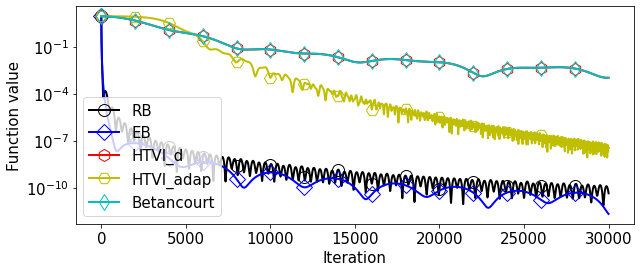

In [35]:
plt.figure(figsize=(10, 4))
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)


## Quartic function 1

Let us start with a quartic function

\begin{equation}\label{eq:quart}
f(X)=[(X-1)^T \Sigma (X-1)]^2\in \mathbb{R}^{50},\quad \Sigma_{ij}=0.9^{|i-j|}. 
\end{equation}
This convex function achieves its minimum value $0$ at $x^*=1$.


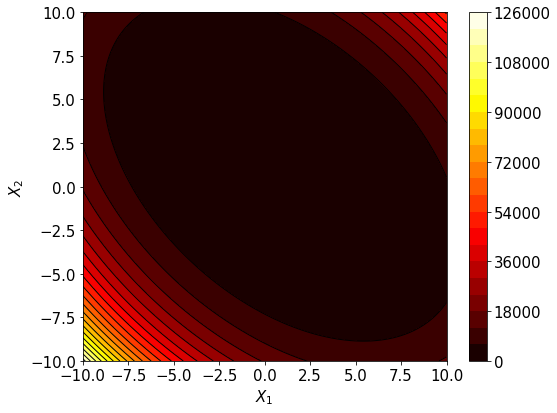

In [39]:
n = 50 # dimension
ex = exa.Ex_Quartic_1(n)
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=1,save=False)

In [44]:
## Parameters
dt = 1e-4
c = 2
C = 0.01#C = 2.302585093
m=0.01
v=1000
mu=0.8
steps =10000
params=[v, m, c, C, mu]
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) #np.zeros(q0.shape)
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

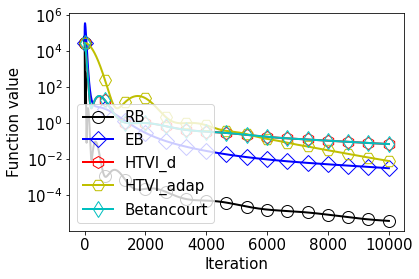

In [45]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)


## Quartic function 2

\begin{equation}
f(X)=\sum_{i=1}^n i X_i^{4},  \quad n=50.
\end{equation}
This function is an example of a convex function that has a global minimum at $f(0)=0$, surrounded by a very flat region.

$x_0=(2,2,...,2)$


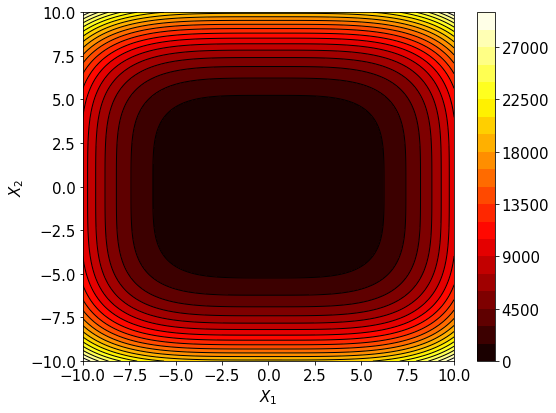

In [50]:
n = 50 # dimension
ex = exa.Ex_Quartic_2() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=2,save=False)

In [53]:
## Parameters
dt = 1e-4
c = 2# order
C = 0.001
mu=0.8
steps =30000
m=0.01
v=1000
params=[v, m, c, C,mu]

# Initial conditions 

p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

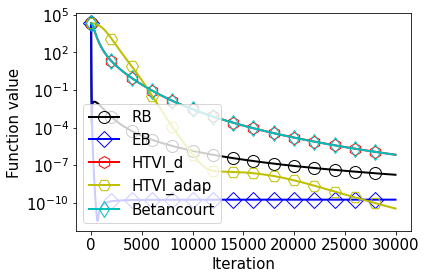

In [54]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Booth function
$$f(x, y) = (x+2 y-7)^{2}+(2 x+y-5)^{2}$$
Global minimum at $f(1,3)=0 .$ We initialize at $x_{0}=(10,10)$. This function is usually evaluated on the region $-10 \leqslant x, y \leqslant 10 .$ All methods perform well on this problem which is not challenging.

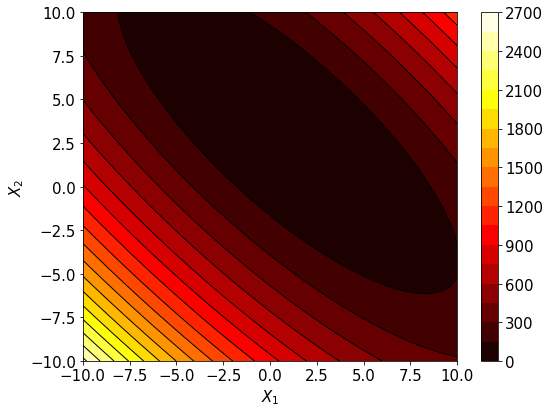

In [55]:
n = 2
seed = 0
ex = exa.Ex_Booth(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=2,save=False)

In [63]:
## Parameters
dt = 1e-4
c = 2# order
C = 0.001
steps =5000
mu=0.8
m=0.01
v=1000
params=[v, m, c, C, mu]
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

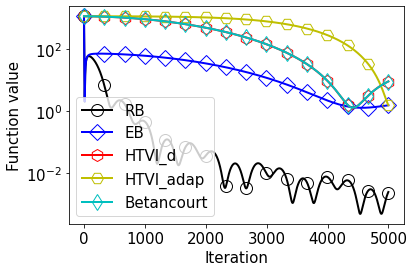

In [64]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Schwefel function
$$f(x) \equiv \sum_{i=1}^{n} x_{i}^{10} .$$
The minimum is at $f(0)=0$. The function is usually considered over $-10 \leqslant x_{i} \leqslant 10$. This function grows even stronger than the previous two cases. We consider $n=20$ dimensions and initialize at $x_{0}=(2, \ldots, 2) .$ Note that $\delta>0$ is essential to control the kinetic energy and improve convergence.


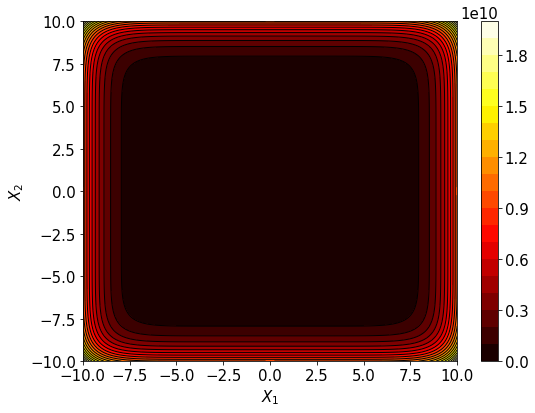

In [65]:
n = 20
seed = 0
ex = exa.Ex_Schwefel(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=2,save=False)

In [66]:
# Params
dt = 1e-3
c = 6# order
C = 0.001       #try 500
steps =20000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

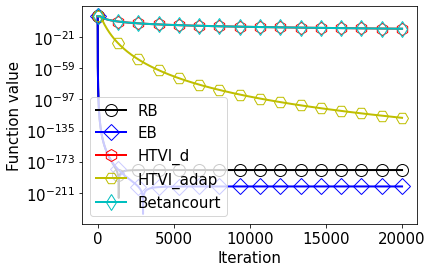

In [67]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)


## Matyas function
Matyas function:
$$f(x, y) \equiv 0.26\left(x^{2}+y^{2}\right)-0.48 x y .$$ 
Global minimum is at $f(0,0)=0 .$ We initialize at $x_{0}=(10,-7)$. This function is usually evaluated on the region $-10 \leqslant x, y \leqslant 10$. 

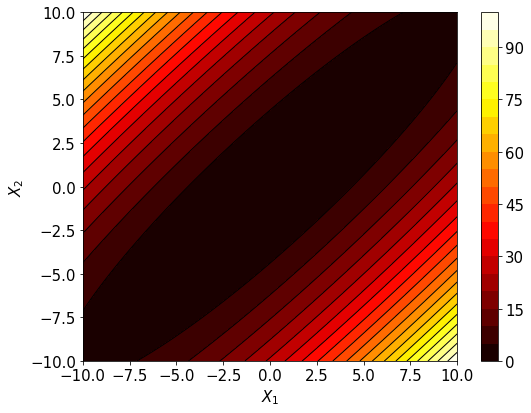

In [71]:
ex = exa.Ex_Matyas() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10, num_ex=3,save=False)

In [74]:
# Params
dt = 1e-3
c = 2 # order 6 has a divergence
C = 0.001 
steps = 2000
m = 0.01
v = 1000
mu = 0.9689
params = [v, m, c, C, mu]
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

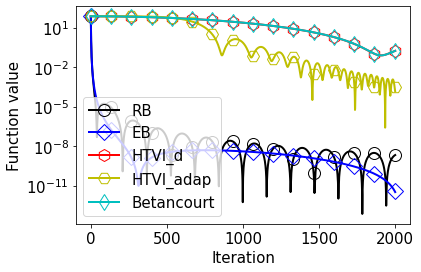

In [75]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Beale function
$f(x, y) \equiv(1.5-x+x y)^{2}+\left(2.25-x+x y^{2}\right)^{2}+(2.625$ $\left.-x+x y^{3}\right)^{2} .$ The global minimum is at $f(3,1 / 2)=0$, lying on a flat and narrow valley which makes optimization challenging. Note also that this functions grows stronger than a quadratic. This function is usually considered on the region $-4.5 \leqslant$ $x, y \leqslant 4.5 .$ We initialize at $x_{0}=(-3,-3) .$ 

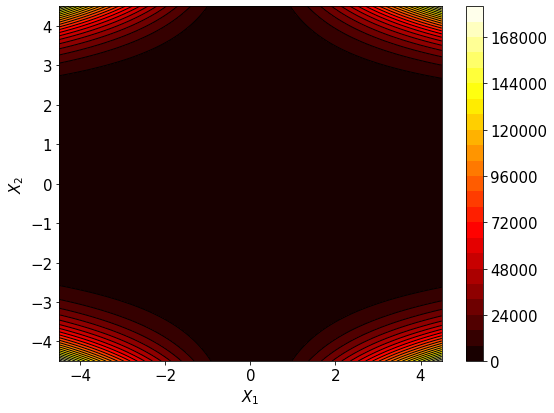

In [76]:
ex = exa.Ex_Beale() 
plot_contourn(ex, xmin=-4.5, xmax=4.5, ymin=-4.5, ymax=4.5, num_ex=3,save=False)

In [90]:
# Params
dt = 1e-4
c = 2
C = 1e-3
steps =5000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [91]:
n=2
x0 = np.array([-3,-3])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

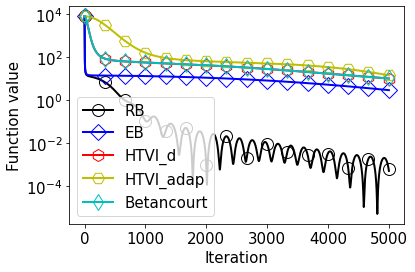

In [92]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Chung-Reynolds function
$$f(x) \equiv\left(\sum_{i=1}^{n} x_{i}^{2}\right)^{2}.$$ The global minimum is at $f(0)=0 .$ This function is usually considered on the region $-100 \leqslant x_{i} \leqslant 100 .$ We consider $n=50$ dimensions and initialize at $x_{0}=(50, \ldots, 50)$. 

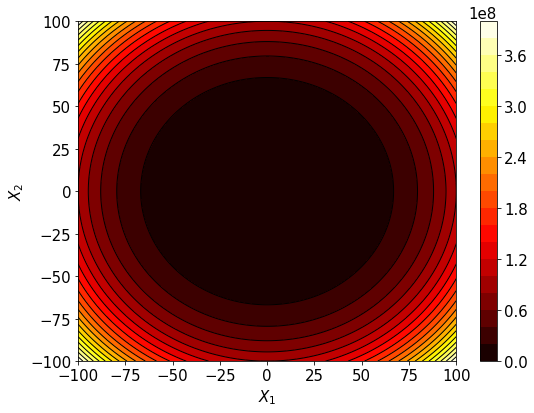

In [99]:
ex = exa.Ex_Chung_Reynolds() 
plot_contourn(ex, xmin=-100, xmax=100, ymin=-100, ymax=100, num_ex=5,save=False)

In [108]:
# Params
dt = 1e-4
c = 6 # order
C = 1e-3
steps =30000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t] 

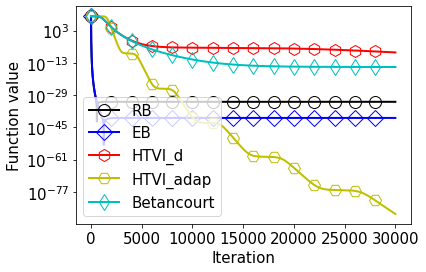

In [109]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Zakharov function
$f(x) \equiv \sum_{i=1}^{n} x_{i}^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{4}$ The minimum is at $f(0)=0 .$ The region of interest is usually $-5 \leqslant x_{i} \leqslant 10$. We consider $n=5$ and initialize at $x_{0}=(1, \ldots, 1) $.

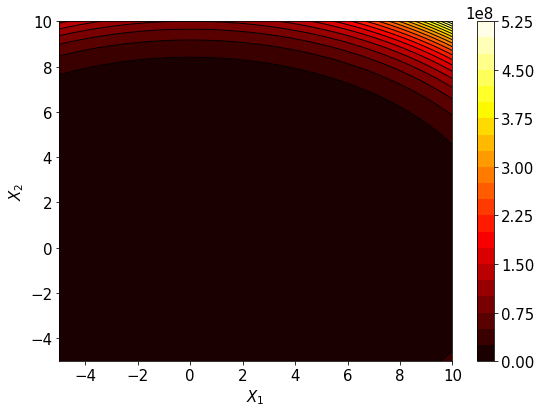

In [131]:
ex = exa.Ex_Zakharov() 
plot_contourn(ex, xmin=-5, xmax=10, ymin=-5, ymax=10, num_ex=6,save=False)

In [135]:
# Params
dt = 1e-4
c = 4# order
C = 0.001
steps =10000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [136]:
n=5
x0 = np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:221: RuntimeWarning: overflow encountered in double_scalars
  return np.sum(x ** 2) + (0.5 * np.dot(seq, x))**2 + (0.5 * np.dot(seq, x))**4
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:89: RuntimeWarning: invalid value encountered in double_scalars
  p1_t2 = (c**3 + c * cdot) / (2 * cdot * (q0_t)**(c + cdot / c + 1)) * dt * np.dot(p1, p1) \
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:225: RuntimeWarning: overflow encountered in double_scalars
  gradV = 2 * x + 2 * (0.5 * np.dot(seq, x)) * seq + 4 * (0.5 * np.dot(seq, x)) ** 3 * seq
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:221: RuntimeWarning: overflow encountered in square
  return np.sum(x ** 2) + (0.5 * np.dot(seq, x))**2 + (0.5 * np.dot(seq, x))**4
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:88:

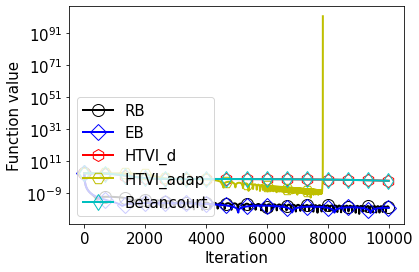

In [137]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)

## Three-hump camel back function
$f(x, y) \equiv 2 x^{2}-1.05 x^{4}+x^{6} / 6+$ $x y+y^{2}$.
This is a multimodal function with global minimum is at $f(0,0)=0$. The region of interest is usually $-5 \leqslant x, y \leqslant 5 .$ We initialize at $x_{0}=(5,5) .$ The two local minima are somewhat close to the global minimum which makes optimization challenging. 


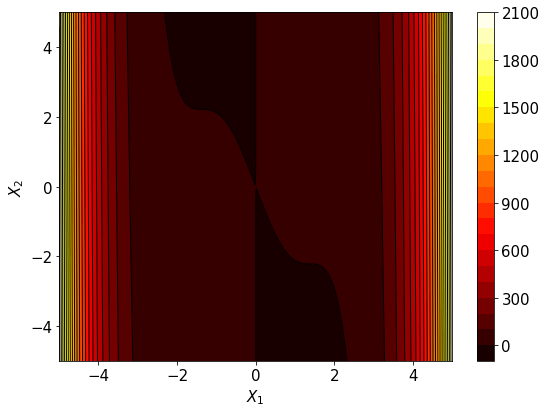

In [125]:
ex = exa.Ex_Three_hump() 
plot_contourn(ex, xmin=-5, xmax=5, ymin=-5, ymax=5, num_ex=7,save=False)


In [126]:
# Params
dt = 1e-3
c = 4 # order
C = 0.001
steps =15000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]
x0_t = 0.01
p0_t = -HBr(ex, ex.x0, ex.p0, ex.x0_t, c) 
init =[ex.x0, ex.x0_t, ex.p0, p0_t]

/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:251: RuntimeWarning: overflow encountered in double_scalars
  gradx= 4*x - 4.20*x**3 + x**5 + y
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:251: RuntimeWarning: invalid value encountered in double_scalars
  gradx= 4*x - 4.20*x**3 + x**5 + y
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:244: RuntimeWarning: overflow encountered in double_scalars
  return 2* x[0]**2 - 1.05 * x[0]**4 + x[0]**6 / 6 + x[0] * x[1] + x[1]**2
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:244: RuntimeWarning: invalid value encountered in double_scalars
  return 2* x[0]**2 - 1.05 * x[0]**4 + x[0]**6 / 6 + x[0] * x[1] + x[1]**2


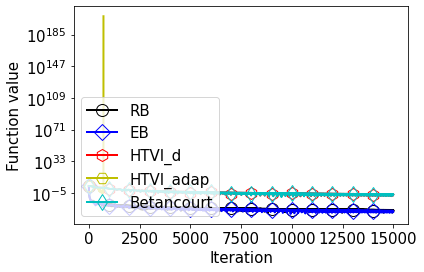

In [127]:
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('EB', color='b', marker='D',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('HTVI_d', color='r', marker='h',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt, steps=steps, ex=ex, init=init)
plot_order('Betancourt', color='c', marker='d',params=params, dt=dt, steps=steps, ex=ex, init=init)